In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

from fastai.vision import *
from fastai.metrics import error_rate
from urllib.request import urlopen
import requests
import json
from PIL import Image

In [ ]:
#load image lists

response = json.loads(requests.get("http://arnelism.com/realestate/labelled/files.json").text)
response_documents = json.loads(requests.get("https://raw.githubusercontent.com/perens/picture-labelling/main/src/resources/dokumendi_blanketid.json").text)


In [ ]:
!mkdir train
!mkdir train/facade0
!mkdir train/facade90
!mkdir train/facade180
!mkdir train/facade270
!mkdir train/interior0
!mkdir train/interior90
!mkdir train/interior180
!mkdir train/interior270
!mkdir train/document0
!mkdir train/document90
!mkdir train/document180
!mkdir train/document270


In [ ]:
#download images

facades = [url for url in response if "facade" in url]
interiors = [url for url in response if "interior" in url]
documents = [url for url in response_documents]

f = open("facades.csv", "a")
for url in facades:
  f.write(url + "\n")
f.close()

f = open("interiors.csv", "a")
for url in interiors:
  f.write(url + "\n")
f.close()

f = open("documents.csv", "a")
for url in documents:
  f.write(url + "\n")
f.close()

download_images("facades.csv", 'train/facade0', max_pics=1000)
download_images("interiors.csv", 'train/interior0', max_pics=1000)
download_images("documents.csv", 'train/document0', max_pics=1000)


In [ ]:
classes = ["facade0", "interior0", "document0"]
path = "train"
for c in classes:
    print(c)
    verify_images(f"train/{c}", delete=True, max_size=1000)

facade0


interior0


document0


In [ ]:
#rotate images

for directory in ["train/facade0", "train/interior0", "train/document0"]:
  #print(directory)
  for entry in os.scandir(directory):
    if entry.path.endswith(".jpg") and entry.is_file():
      #print(".", end=" ")
      img = Image.open(entry.path)
      path_parts = img.filename.split('/')      
      label = path_parts[1][:-1]
      degrees = [90, 180, 270]
      filename = path_parts[2]
      for d in degrees:
          rotate_img = img.rotate(d)
          rot_name =  f"train/{label}{d}/{filename}"
          rotate_img.save(rot_name)

train/facade0
train/facade0/00000076.jpg train/facade0/00000018.jpg train/facade0/00000232.jpg train/facade0/00000437.jpg train/facade0/00000528.jpg train/facade0/00000187.jpg train/facade0/00000172.jpg train/facade0/00000300.jpg train/facade0/00000210.jpg train/facade0/00000332.jpg train/facade0/00000031.jpg train/facade0/00000562.jpg train/facade0/00000307.jpg train/facade0/00000479.jpg train/facade0/00000128.jpg train/facade0/00000009.jpg train/facade0/00000264.jpg train/facade0/00000314.jpg train/facade0/00000223.jpg train/facade0/00000290.jpg train/facade0/00000279.jpg train/facade0/00000412.jpg train/facade0/00000433.jpg train/facade0/00000548.jpg train/facade0/00000239.jpg train/facade0/00000396.jpg train/facade0/00000216.jpg train/facade0/00000097.jpg train/facade0/00000544.jpg train/facade0/00000312.jpg train/facade0/00000197.jpg train/facade0/00000438.jpg train/facade0/00000426.jpg train/facade0/00000149.jpg train/facade0/00000189.jpg train/facade0/00000506.jpg train/facade0/

facade


cannot identify image file <_io.BufferedReader name='train/facade/00000027.jpg'>
interior


In [ ]:
path = "train"
data = ImageDataBunch.from_folder(
    path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4
    ).normalize(imagenet_stats)


In [ ]:
data.classes

['document0',
 'document180',
 'document270',
 'document90',
 'facade0',
 'facade180',
 'facade270',
 'facade90',
 'interior0',
 'interior180',
 'interior270',
 'interior90']

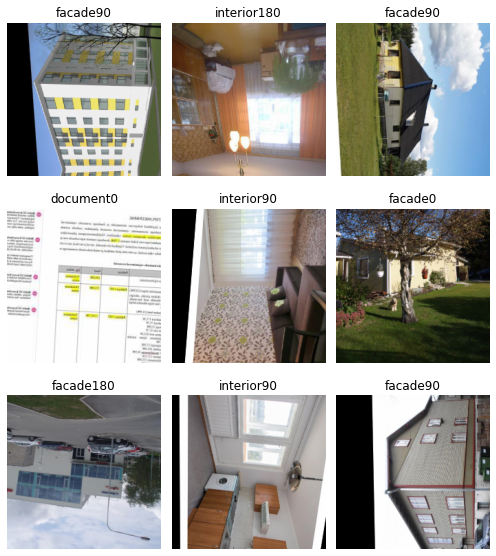

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(5) #change to 5 for more training
interp = ClassificationInterpretation.from_learner(learn)

epoch,train_loss,valid_loss,accuracy,time
0,1.801760,0.817020,0.647175,02:08
1,1.187354,0.933251,0.652131,02:07
2,0.860148,0.649588,0.665015,02:07
3,0.691791,0.624763,0.640238,02:07
4,0.607332,0.610322,0.659068,02:08


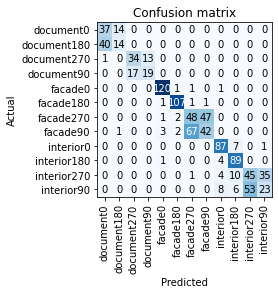

In [ ]:
interp.plot_confusion_matrix()

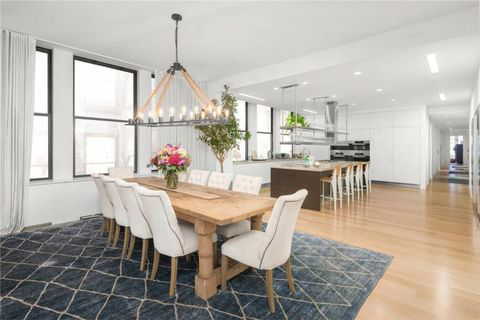

In [ ]:
from urllib.request import urlopen
img = open_image(urlopen("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fhips.hearstapps.com%2Fhmg-prod.s3.amazonaws.com%2Fimages%2Fhbz-jennifer-lopez-penthouse-01-1507665932.jpg%3Fcrop%3D1xw%3A1xh%3Bcenter%2Ctop%26resize%3D480%3A*&f=1&nofb=1"))
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)

data.classes[int(pred_class)]

'interior0'

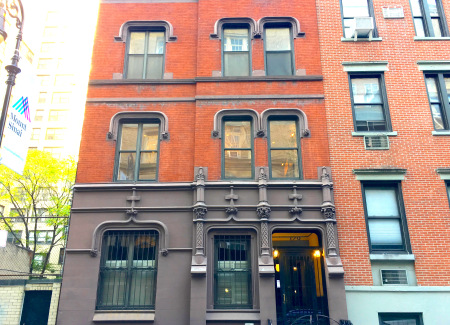

In [ ]:
from urllib.request import urlopen
img = open_image(urlopen("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fephemeralnewyork.files.wordpress.com%2F2016%2F10%2Fapartmentfirstcloseup.jpg%3Fw%3D450%26h%3D326&f=1&nofb=1"))
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)

data.classes[int(pred_class)]

'facade0'

In [ ]:
learn.export("model5epochs.pkl")